In [40]:
import pandas as pd # data processing, CSV file I/O 
import os #To Interact with local system directories
import numpy as np # linear algebra
import matplotlib.pyplot as plt # For Plotting the Visualizations/Graphs
import seaborn as sns #For the diffetent kind of vizualizations
from scipy import stats #iFor probability plot
from sklearn.ensemble import RandomForestRegressor # For Random forest algorithm
from sklearn.model_selection import train_test_split,RandomizedSearchCV #For model splitting and fit
from sklearn.tree import DecisionTreeRegressor #Importing Decision Tree Regressor from sklear.tree
import statsmodels.api as sm #for Linear Regression model
%matplotlib inline

In [4]:
#Set working directory
os.chdir("C:/Users/poorna.chimirala/Documents/Python")
print(os.getcwd())

C:\Users\poorna.chimirala\Documents\Python


In [5]:
#Read the csv file
df_day=pd.read_csv("day.csv")

In [6]:
#Get first 5 rows
print(df_day.head())

#Get the number of rows and columns
print(df_day.shape)

#Get the data types of variables
print(df_day.dtypes)

#data  consist of Integers , Float  and Object(categorical) variables

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
(731, 16)
instant         

In [7]:
#Droping variables which are not requried.

#instant - index number
#dteday- all the requried like month week day all ready present
#droping casual and registered because there sum is equal to target variable ie. 'cnt'
df_day = df_day.drop(["instant","dteday","casual","registered"],axis = 1)

df_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64
Skewness: -0.047353


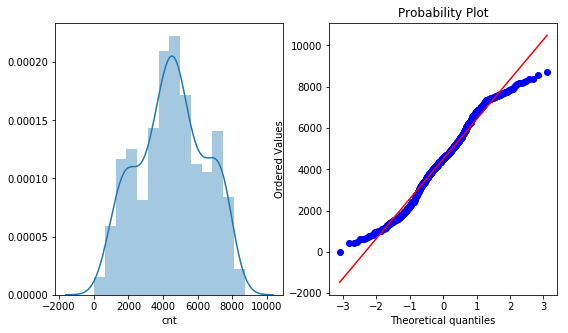

In [8]:
##################################################### Univariate Analysis##########################################
# Target variable  analysis

#Check whether target variable is normal or not
fig,(x1,x2) = plt.subplots(ncols=2)
fig.set_size_inches(9,5)
sns.distplot(df_day['cnt'],ax = x1)
stats.probplot(df_day["cnt"], dist='norm', fit=True,plot = x2)

#descriptive statistics summary
print(df_day['cnt'].describe())
print("Skewness: %f" % df_day['cnt'].skew())

In [9]:
#Create a new dataframe containing required columns and creating new columns
df = df_day.copy()
df.head()

#Create new columns
df['actual_temp'] = df_day['temp'] * 39
df['actual_feel_temp'] = df_day['atemp'] * 50
df['actual_windspeed'] = df_day['windspeed'] * 67
df['actual_hum'] = df_day['hum'] * 100
df['actual_season'] = df_day['season'].replace([1,2,3,4],["Spring","Summer","Fall","Winter"])
df['actual_yr'] = df_day['yr'].replace([0,1],["2011","2012"])
df['actual_holiday'] = df_day['holiday'].replace([0,1],["Working day","Holiday"])
df['actual_weathersit'] = df_day['weathersit'].replace([1,2,3,4],["Clear","Cloudy/Mist","Rain/Snow/Fog","Heavy Rain/Snow/Fog"])

#Check the data types new variables
print(df.dtypes)

#Change the data types
df['weathersit'] = df['weathersit'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['yr'] = df['yr'].astype('category')
df['season'] = df['season'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weekday'] = df['weekday'].astype('category')
df['mnth'] = df['mnth'].astype('category')
df['actual_season'] = df['actual_season'].astype('category')
df['actual_yr'] = df['actual_yr'].astype('category')
df['actual_holiday'] = df['actual_holiday'].astype('category')
df['actual_weathersit'] = df['actual_weathersit'].astype('category')

print(df.dtypes)

season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
cnt                    int64
actual_temp          float64
actual_feel_temp     float64
actual_windspeed     float64
actual_hum           float64
actual_season         object
actual_yr             object
actual_holiday        object
actual_weathersit     object
dtype: object
season               category
yr                   category
mnth                 category
holiday              category
weekday              category
workingday           category
weathersit           category
temp                  float64
atemp                 float64
hum                   float64
windspeed             float64
cnt                     int64
actual_temp           float64
actual_feel_temp

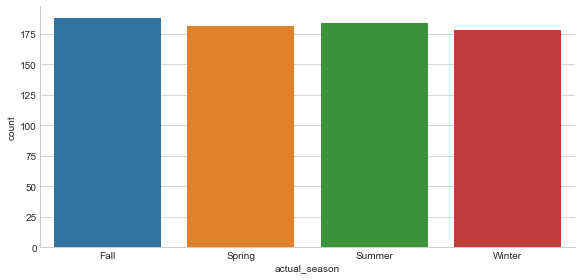

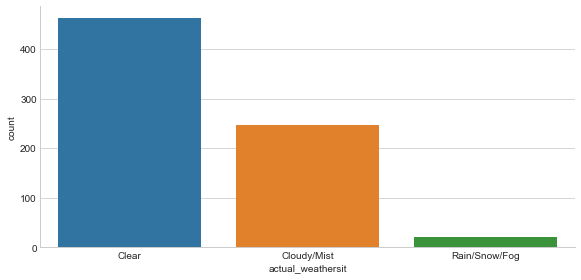

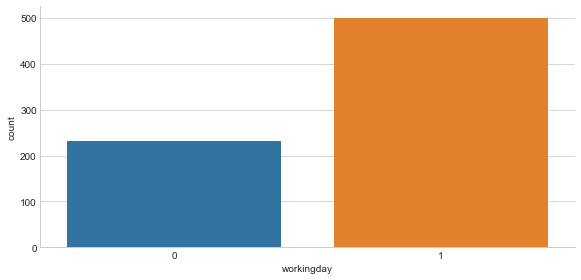

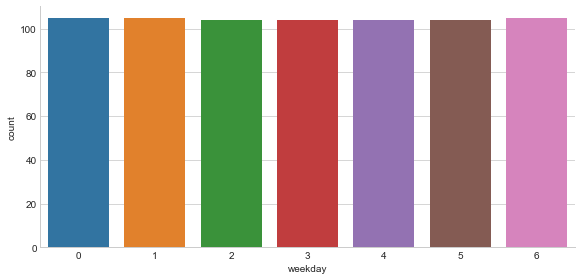

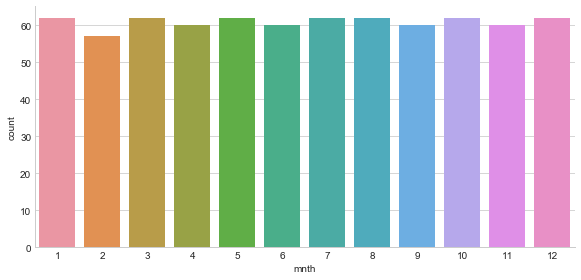

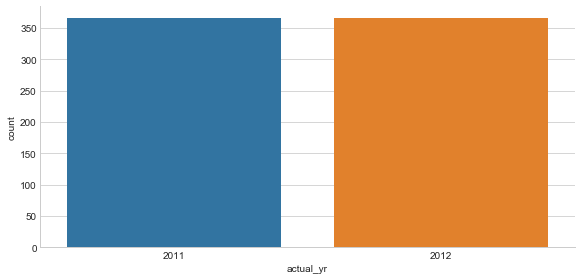

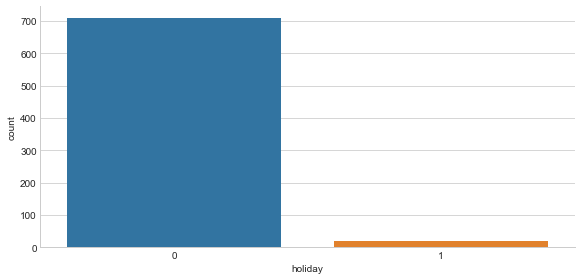

In [10]:
#Check the bar graph of categorical Data using factorplot
sns.set_style("whitegrid")
sns.factorplot(data=df, x='actual_season', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='actual_weathersit', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='workingday', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='weekday', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='mnth', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='actual_yr', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='holiday', kind= 'count',size=4,aspect=2)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


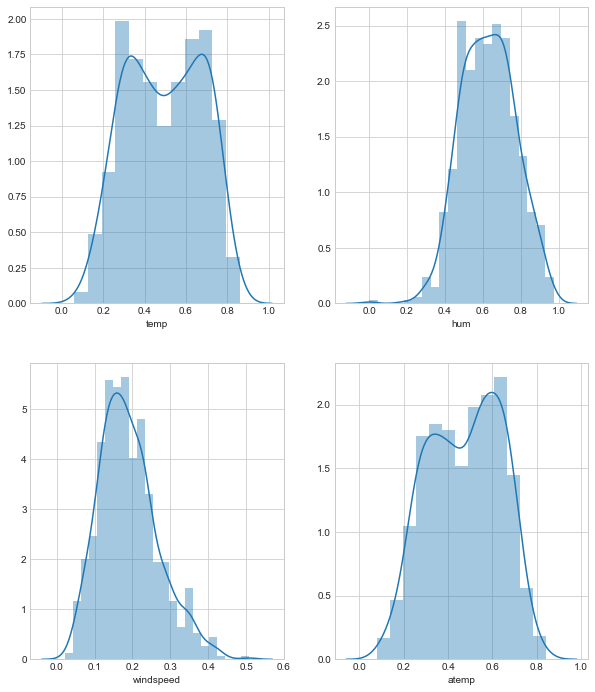

In [11]:
#Distribution  independent numeric variables 
#Check whether  independent numeric variables are normal or not
fig,axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,12)
sns.distplot(df_day['temp'],ax=axes[0][0])
sns.distplot(df_day['hum'],ax=axes[0][1])
sns.distplot(df_day['windspeed'],ax=axes[1][0])
sns.distplot(df_day['atemp'],ax=axes[1][1])


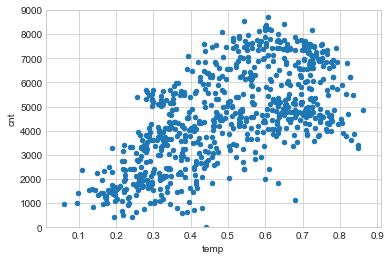

In [12]:
######################################### Bivariate  Relationship #####################################################
  

#relation between Numerical Variable 'temp' and target variable 'cnt'

df['temp'].value_counts()

#Now draw scatter plot between 'temp' and 'cnt' variables

var = 'temp'
data = pd.concat([df['cnt'], df[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

# It is showing  there is good relation between 'temp' and 'cnt'

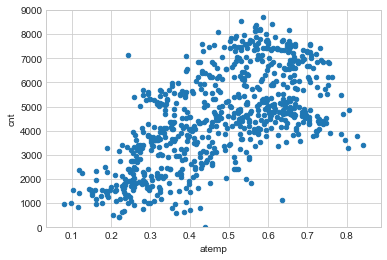

In [13]:
#relation between Numerical Variable 'atemp' and target variable 'cnt'

df['atemp'].value_counts()

#Now draw scatter plot between 'temp' and 'cnt' variables

var = 'atemp'
data = pd.concat([df['cnt'], df[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

# It is showing  there is good relation between 'atemp' and 'cnt'

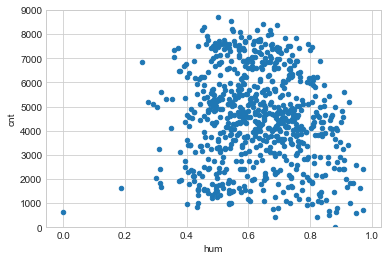

In [14]:
#relation between Numerical Variable 'hum' and target variable 'cnt'

df['hum'].value_counts()

#Now draw scatter plot between 'hum' and 'cnt' variables

var = 'hum'
data = pd.concat([df['cnt'], df[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

# It is showing  there is average relation between 'atemp' and 'cnt'

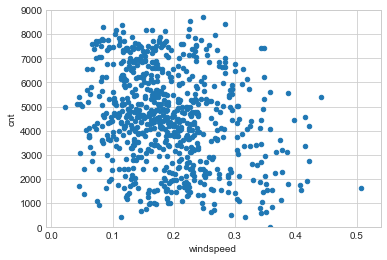

In [15]:
#relation between Numerical Variable 'windspeed' and target variable 'cnt'

df['windspeed'].value_counts()

#Now draw scatter plot between 'windspeed' and 'cnt' variables

var = 'windspeed'
data = pd.concat([df['cnt'], df[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

# It is showing  there is nagative relation between 'windspeed' and 'cnt'

[Text(0,0.5,'cnt'),
 Text(0.5,0,'workingday'),
 Text(0.5,1,'Boxplot for cnt vs workingday')]

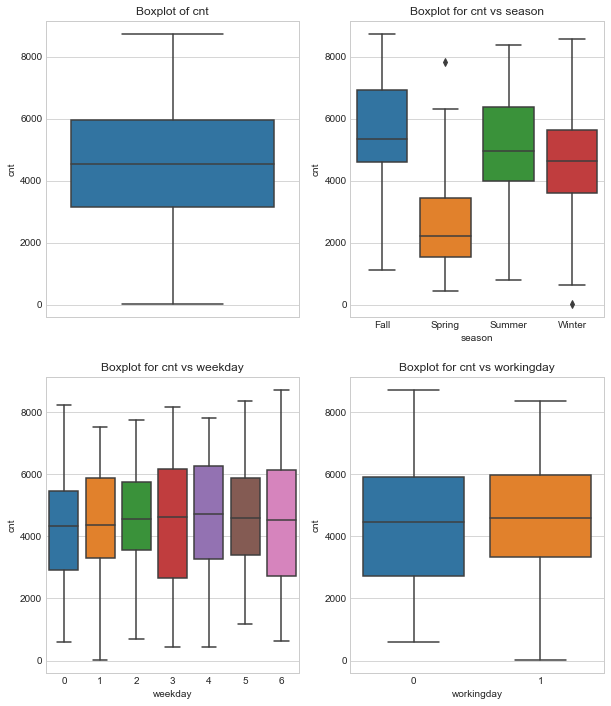

In [16]:
# Box plot for Categorical Variables with 'CNT' to know the releation
fig,axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,12)
sns.boxplot(data=df,y="cnt",orient='v',ax=axes[0][0])
sns.boxplot(data=df,y="cnt",x="actual_season",orient='v',ax=axes[0][1])
sns.boxplot(data=df,y="cnt",x="weekday",orient="v",ax=axes[1][0])
sns.boxplot(data=df,y="cnt",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='cnt',title = "Boxplot of cnt")
axes[0][1].set(xlabel="season",ylabel="cnt",title="Boxplot for cnt vs season")
axes[1][0].set(xlabel="weekday", ylabel="cnt",title="Boxplot for cnt vs weekday")
axes[1][1].set(xlabel="workingday",ylabel="cnt",title="Boxplot for cnt vs workingday")

[Text(0,0.5,'cnt'),
 Text(0.5,0,'holiday'),
 Text(0.5,1,'Boxplot for cnt vs holiday')]

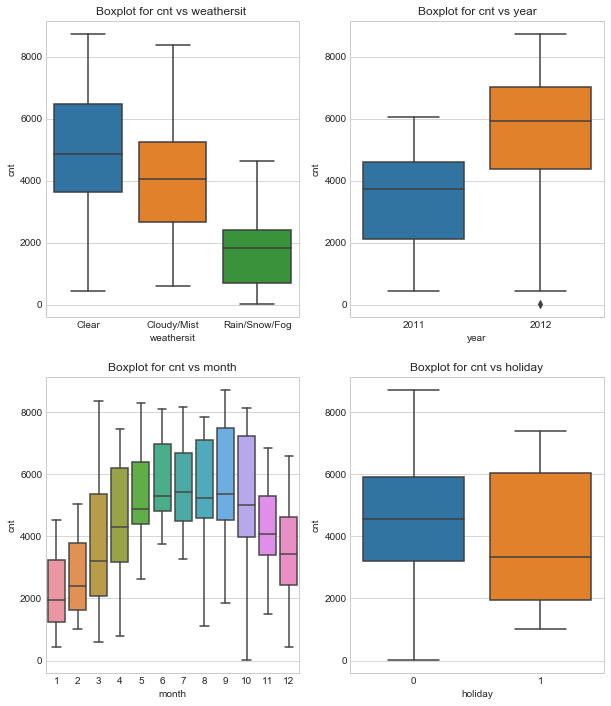

In [17]:
fig,axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,12)
sns.boxplot(data=df,y="cnt",x="actual_weathersit",orient='v',ax=axes[0][0])
sns.boxplot(data=df,y="cnt",x="actual_yr",orient='v',ax=axes[0][1])
sns.boxplot(data=df,y="cnt",x="mnth",orient="v",ax=axes[1][0])
sns.boxplot(data=df,y="cnt",x="holiday",orient="v",ax=axes[1][1])

axes[0][0].set(xlabel='weathersit',ylabel="cnt",title = "Boxplot for cnt vs weathersit ")
axes[0][1].set(xlabel="year",ylabel="cnt",title="Boxplot for cnt vs year")
axes[1][0].set(xlabel="month", ylabel="cnt",title="Boxplot for cnt vs month")
axes[1][1].set(xlabel="holiday",ylabel="cnt",title="Boxplot for cnt vs holiday")

In [18]:

##########################################   Missing  value Analysis ##############################################

total = df_day.isnull().sum().sort_values(ascending=False)
percent = (df_day.isnull().sum()/df_day.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)


#no Missing Values found in the data

,Total,Percent
cnt,0,0.0
windspeed,0,0.0
hum,0,0.0
atemp,0,0.0
temp,0,0.0
weathersit,0,0.0
workingday,0,0.0
weekday,0,0.0
holiday,0,0.0
mnth,0,0.0


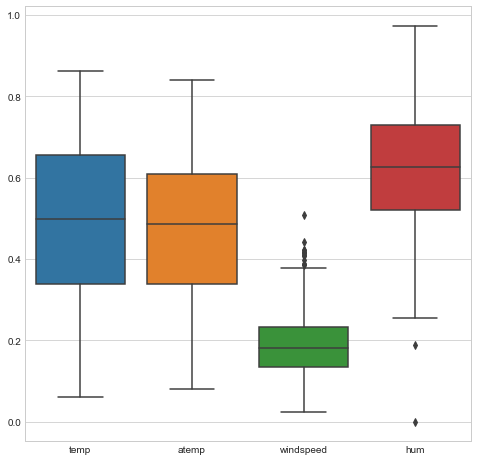

In [19]:
######################################### Outlier Analysis ##########
sns.boxplot(data=df_day[['temp','atemp','windspeed','hum']])
fig=plt.gcf()
fig.set_size_inches(8,8)


(731, 12)
-0.10065856213715528
-0.23454499742167
-0.13662144982383403
-0.2161932882927355
(717, 12)


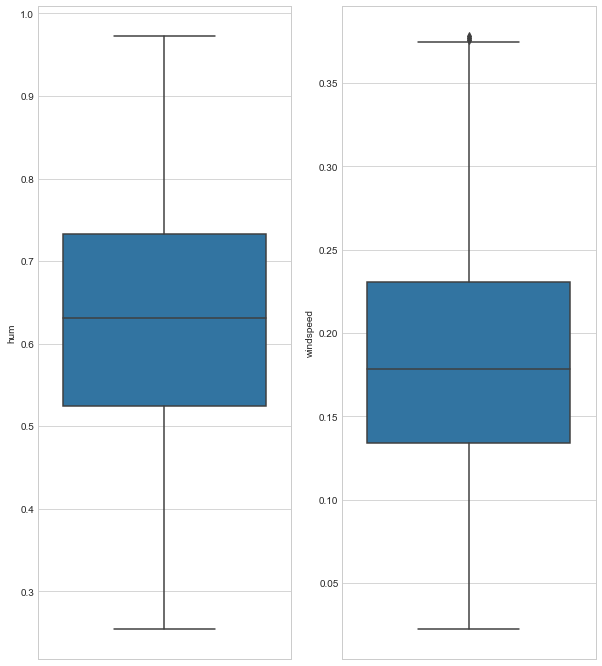

In [20]:
#removing outliers and checking corelation
print(df_day.shape)
print(df_day['hum'].corr(df_day['cnt']))
print(df_day['windspeed'].corr(df_day['cnt']))

q75, q25 = np.percentile(df_day.loc[:,'hum'], [75 ,25])
iqr = q75 - q25
       
        
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)



df_day = df_day.drop(df_day[df_day.loc[:,'hum'] < min].index)
df_day = df_day.drop(df_day[df_day.loc[:,'hum'] > max].index)

q75, q25 = np.percentile(df_day.loc[:,'windspeed'], [75 ,25])
iqr = q75 - q25

min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

df_day = df_day.drop(df_day[df_day.loc[:,'windspeed'] < min].index)
df_day = df_day.drop(df_day[df_day.loc[:,'windspeed'] > max].index)

fig,(x1,x2) = plt.subplots(ncols=2)
fig.set_size_inches(10,12)
# Boxplot for casual after  aoutlier removal

sns.boxplot(x=df_day['hum'],orient ='v',ax = x1)
sns.boxplot(x=df_day['windspeed'],orient ='v',ax = x2)


# Correlation between ''casual'hum,'windspeed' and 'cnt'  after  removal of  outliers
print(df_day['hum'].corr(df_day['cnt']))
print(df_day['windspeed'].corr(df_day['cnt']))
print(df_day.shape)


In [21]:
#######################################  Feature  Scaling ######################################

# In dataset  numeric  variables like ‘temp’ , ‘atem’ ,’hum’ and ‘ windspeed’ are in normalization form 
#no Need of Feature scaling

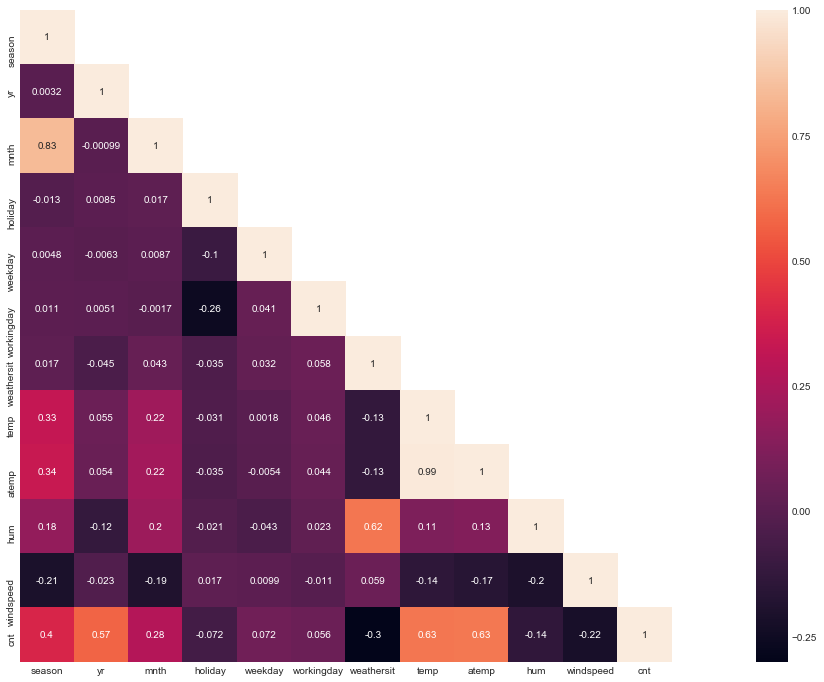

In [22]:
############################################# feature  selection   #######################################
#Check for collinearity using corelation matrix.
cor_mat= df_day[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)


In [23]:
#As per above Correlation  graph, there is strong relation between Independent variables'temp' & 'atemp'.
# There is a poor relation between  Independent variables 'holiday','weekday','workingday' and dependent  variable 'cnt'
# so dropping the above variables for best feature selection

df_day_feature_selection = df_day.drop(['atemp','holiday','weekday','workingday'],axis = 1)
print(df_day_feature_selection.shape)
df_day_feature_selection.head()

(717, 8)


,season,yr,mnth,weathersit,temp,hum,windspeed,cnt
0,1,0,1,2,0.344167,0.805833,0.160446,985
1,1,0,1,2,0.363478,0.696087,0.248539,801
2,1,0,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,1,0.200000,0.590435,0.160296,1562
4,1,0,1,1,0.226957,0.436957,0.186900,1600


In [24]:
#diividing  Test and train data using skilearn train_test_split 



train,test = train_test_split(df_day_feature_selection, test_size = 0.2,random_state = 123 )

print(train.head())
print(test.head())


     season  yr  mnth  weathersit      temp       hum  windspeed   cnt
232       3   0     8           1  0.710833  0.770000   0.248754  3873
156       2   0     6           1  0.678333  0.600000   0.121896  4548
465       2   1     4           1  0.446667  0.435000   0.249375  5918
167       2   0     6           1  0.649167  0.735833   0.143029  4844
334       4   0    12           1  0.312500  0.524583   0.220158  3727
     season  yr  mnth  weathersit      temp       hum  windspeed   cnt
226       3   0     8           1  0.665833  0.712083   0.208954  4338
430       1   1     3           1  0.258333  0.456667   0.200875  3956
649       4   1    10           1  0.435000  0.463333   0.181596  7570
653       4   1    10           2  0.561667  0.707500   0.296037  5875
342       4   0    12           1  0.290833  0.695833   0.082717  3620


In [25]:
#********************************** Decision Tree  Regressor ************************************


dt_model = DecisionTreeRegressor(random_state=123).fit(train.iloc[:,0:7], train.iloc[:,7])

print(dt_model)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=123, splitter='best')


In [26]:
dt_predictions = dt_model.predict(test.iloc[:,0:7])
print(dt_predictions)

[4484. 3830. 7282. 7112. 3614. 5572. 6273. 4294. 6569. 4352. 3322. 4120.
 3867. 2493. 5976. 3005. 3805. 1872.  920. 3644. 6153. 4010. 6855. 4098.
 1416. 4966. 3744. 3510. 4127.  959. 4333. 5611. 6966. 4010. 6230. 1472.
 3709. 4459. 4023. 5375. 6169. 6591. 7733. 1891. 4308. 4634. 4401. 2115.
 5046. 5713. 3005. 6889. 6043. 4905. 7509. 6043. 1977. 2914. 5445. 5582.
 5810. 6569. 2689. 7494. 6118. 5026. 4839. 3310. 3520. 7697. 3785. 2689.
 2660. 1815. 6569. 3239. 5260. 4864. 1530. 4717. 5713. 3542. 4579. 4308.
 4326. 3613. 7591. 6043. 5515. 4120. 3423. 3510. 5375. 7691.  822. 6230.
 4098. 7767. 5992. 4648. 2496. 2423. 4318. 4905. 1526. 4459. 4326. 3910.
 5810. 5936. 4840. 1985. 4333. 6230. 2294. 3663. 4258. 3717. 2177. 3574.
 3867. 7415. 4758. 5058. 4182. 7498. 2252. 4010. 5918. 7384. 3669. 2425.
 6460. 6889. 4539. 6227. 6133. 5342. 5582. 6639. 7359. 2425. 4352. 5180.]


In [27]:
df_results = pd.DataFrame({'actual': test.iloc[:,7], 'pred': dt_predictions})
df_results.head()

,actual,pred
226,4338,4484.0
430,3956,3830.0
649,7570,7282.0
653,5875,7112.0
342,3620,3614.0


In [32]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    MAE = np.mean(np.abs((y_true - y_pred)))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    print("MAPE is: ",mape)
    print("MAE is: ",MAE)              
    return mape

def RMSE(y_test,y_predict):
    mse = np.mean((y_test-y_predict)**2)
    print("Mean Square : ",mse)
    rmse=np.sqrt(mse)
    print("Root Mean Square : ",rmse)
    return rmse

MAPE(test.iloc[:,7], dt_predictions)
RMSE(test.iloc[:,7], dt_predictions)
#MAPE is:  0.19246933238644948
#MAE is:  764.8472222222222
#Mean Square :  1012321.5277777778
#Root Mean Square :  1006.1419024063046

MAPE is:  0.19246933238644948
MAE is:  764.8472222222222
Mean Square :  1012321.5277777778
Root Mean Square :  1006.1419024063046


1006.1419024063046

In [33]:

############################################# Linear Regression ############################



#Create continuous data. Save target variable first
train_lr = train[['cnt','temp','hum','windspeed']]
test_lr = test[['cnt','temp','hum','windspeed']]

cat_names = ["season", "yr", "mnth", "weathersit"]


for i in cat_names:
    temp1 = pd.get_dummies(train[i], prefix = i)
    temp2 = pd.get_dummies(test[i], prefix = i)
    train_lr = train_lr.join(temp1)
    test_lr = test_lr.join(temp2)

train_lr.head()


,cnt,temp,hum,windspeed,season_1,season_2,season_3,season_4,yr_0,yr_1,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_1,weathersit_2,weathersit_3
232,3873,0.710833,0.770000,0.248754,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
156,4548,0.678333,0.600000,0.121896,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
465,5918,0.446667,0.435000,0.249375,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
167,4844,0.649167,0.735833,0.143029,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
334,3727,0.312500,0.524583,0.220158,0,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,0


In [34]:
#develop Linear Regression model using sm.ols

dt_lnr_model = sm.OLS(train_lr.iloc[:,0], train_lr.iloc[:,1:]).fit()

#Summary of model
print(dt_lnr_model.summary())

#predict the  model

dt_predict_LR = dt_lnr_model.predict(test_lr.iloc[:,1:])

print(dt_predict_LR)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     152.2
Date:                Thu, 25 Jul 2019   Prob (F-statistic):          1.49e-209
Time:                        12:53:46   Log-Likelihood:                -4616.4
No. Observations:                 573   AIC:                             9275.
Df Residuals:                     552   BIC:                             9366.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
temp          4522.0963    458.847      9.855   

In [35]:
MAPE(test_lr.iloc[:,0], dt_predict_LR)
RMSE(test_lr.iloc[:,0], dt_predict_LR)
#MAPE is:  0.16879845030544732
#MAE is:  625.407468333216
#Mean Square :  706297.5937208855
#Root Mean Square :  840.4151317776742

MAPE is:  0.16879845030544732
MAE is:  625.407468333216
Mean Square :  706297.5937208855
Root Mean Square :  840.4151317776742


840.4151317776742

In [41]:
################################################Random Forest#######################################################################
rf = RandomForestRegressor(random_state=12345)
np.random.seed(12)

# selecting best max_depth, maximum features, split criterion and number of trees
param_dist = {'max_depth': [2,4,6,8,10],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2',None],
              "n_estimators" : [100 ,200 ,300 ,400 ,500]
             }
cv_randomForest = RandomizedSearchCV(rf, cv = 10,
                     param_distributions = param_dist, 
                     n_iter = 10)

cv_randomForest.fit(train.iloc[:,0:7], train.iloc[:,7])
print('Best Parameters using random search: \n', 
      cv_randomForest.best_params_)

Best Parameters using random search: 
 {'n_estimators': 300, 'max_features': 'log2', 'max_depth': 8, 'bootstrap': False}


In [42]:
# setting parameters

# Set best parameters given by random search # Set be 
rf.set_params(max_features = 'log2',
               max_depth =8, 
               n_estimators = 300,
              bootstrap = 'False'
                )

rf.fit(train.iloc[:,0:7], train.iloc[:,7])

# Use the forest's predict method on the test data
dt_rfPredictions = rf.predict(test.iloc[:,0:7])

print(dt_rfPredictions)

[4629.65015835 3361.93090931 6483.72413386 6445.70234064 3587.69214239
 5892.21650937 6187.49095466 4287.45438141 7044.49516255 3865.93823946
 3208.50944793 4160.07550949 4630.58660443 2699.95358971 4509.66155561
 4030.43870754 4739.05345477 2061.17090272 2498.65213148 3841.12164931
 6024.41561875 4169.57468978 6485.87544257 4624.93097817 1373.1859549
 4787.59130882 3187.78042083 5425.09834671 4803.62619643 1377.53838132
 4742.92213905 5088.59742352 6990.24150785 4154.07752965 5115.98199518
 1881.77614497 3430.21307828 6365.39154627 3857.49998634 2868.41098249
 5750.92904626 6545.0765593  7130.24767313 2187.35542341 3918.999362
 4838.90176101 4005.29340798 2091.34800273 4927.29602871 6485.63319458
 3330.4938363  6570.86026407 6748.76177414 4932.21895635 6354.57593665
 4642.49720296 2195.92883068 2978.66945391 5180.60845788 4840.30969107
 6263.36244466 7031.83106226 2175.11336605 7076.38509014 6624.54217944
 5034.90483862 4783.79701115 3132.07276067 3499.80923665 7145.28669792
 4626.129

In [43]:
MAPE(test.iloc[:,7], dt_rfPredictions)
RMSE(test.iloc[:,7], dt_rfPredictions)
rf_errors = abs(dt_rfPredictions - test.iloc[:,7])
#MAPE is:  0.13203573754389147
#MAE is:  487.0455405920468
#Mean Square :  441579.59408990276
#Root Mean Square :  664.5145552129786

MAPE is:  0.13203573754389147
MAE is:  487.0455405920468
Mean Square :  441579.59408990276
Root Mean Square :  664.5145552129786


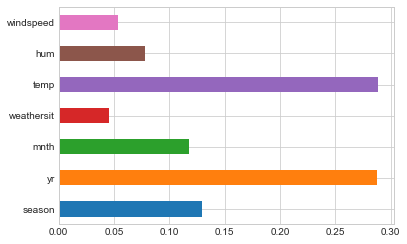

In [275]:
#VariableImportanceInRandomForest
feature_importance =  pd.Series(rf.feature_importances_, index=train.iloc[:,0:7].columns)
feature_importance.plot(kind='barh')

In [44]:
#Example of output with a sample input.
#model input and output
pd.DataFrame(test).to_csv('InputtestdataPyhon.csv', index = False)
pd.DataFrame(dt_rfPredictions, columns=['predictions']).to_csv('outputRandomForestPy.csv')